In [55]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Translado la data a un formato legible con pandas

In [56]:
data = pd.read_csv('Diabetes_prediction.csv')


# Veo la información para ver su configuracion y si es necesario limpiarla

In [57]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42.749868,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32.797789,0


In [58]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Diagnosis                     int64
dtype: object

# Creo dos variables una de diabeticos y otra de no diabeticos y veo el numero de muestras de cada uno

In [71]:
diabeticos = data[data['Diagnosis'] == 1]
no_diabeticos = data[data['Diagnosis'] == 0]

print('Numero de personas diabeticas en el estudio: ',len(diabeticos))
print('Numero de personas no diabeticas en el estudio: ',len(no_diabeticos))

Numero de personas diabeticas en el estudio:  306
Numero de personas no diabeticas en el estudio:  694


# Creo una grafica con la proporcion de edades en el data set

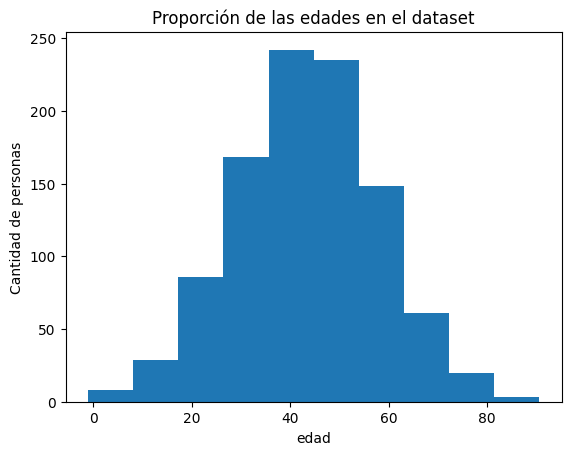

In [76]:
plt.hist(data['Age'])
plt.title('Proporción de las edades en el dataset')
plt.ylabel('Cantidad de personas')
plt.xlabel('edad')


plt.show()

# Veo las correlaciones de las diferentes variable


<Axes: title={'center': 'Correlación entre variables'}>

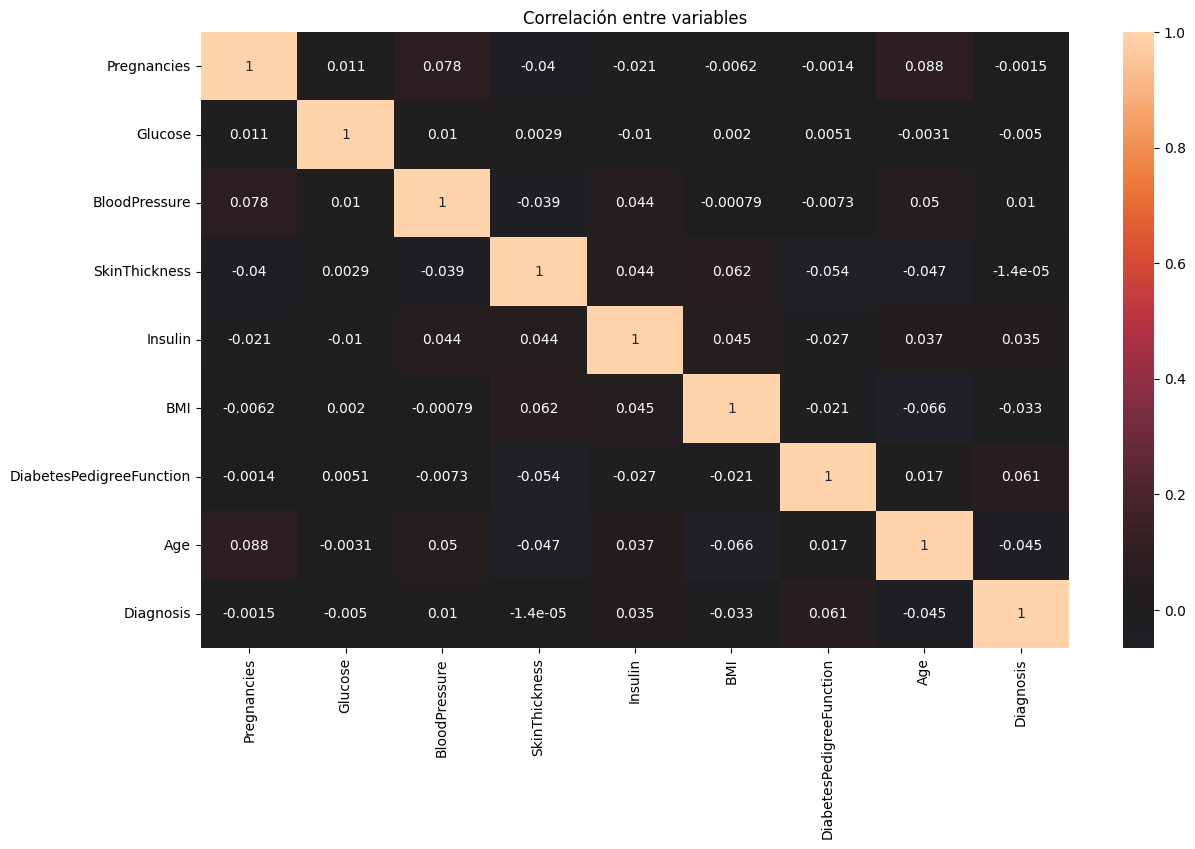

In [78]:
corr_matrix=data.corr()
plt.figure(1, figsize=(14,8))
plt.title('Correlación entre variables')
sns.heatmap(corr_matrix,center=0, annot=True)

# Veo diferentes dispersiones de la edad con respecto a mi otras variables

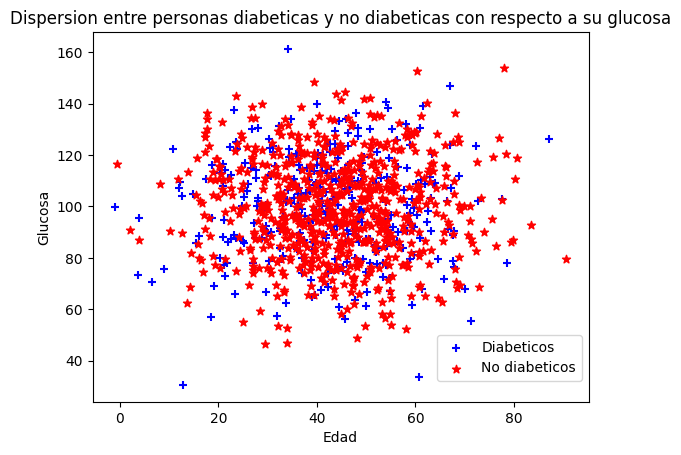

In [79]:
plt.scatter(diabeticos['Age'],diabeticos['Glucose'],marker='+',color='blue',label='Diabeticos')
plt.scatter(no_diabeticos['Age'],no_diabeticos['Glucose'],marker='*',color='red',label='No diabeticos')
plt.title('Dispersion entre personas diabeticas y no diabeticas con respecto a su glucosa')
plt.ylabel('Glucosa')
plt.xlabel('Edad')

plt.legend(bbox_to_anchor=(1,0.2))
plt.show()

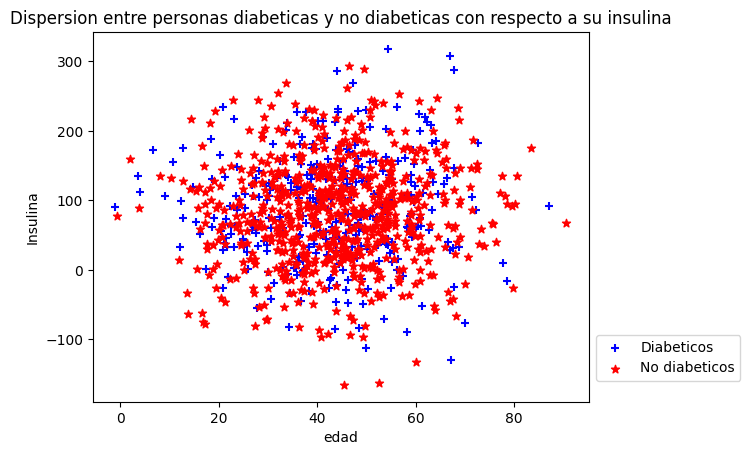

In [80]:
plt.scatter(diabeticos['Age'],diabeticos['Insulin'],marker='+',color='blue',label='Diabeticos')
plt.scatter(no_diabeticos['Age'],no_diabeticos['Insulin'],marker='*',color='red',label='No diabeticos')

plt.title('Dispersion entre personas diabeticas y no diabeticas con respecto a su insulina')
plt.ylabel('Insulina')
plt.xlabel('edad')

plt.legend(bbox_to_anchor=(1,0.2))
plt.show()

# Creo el modelo que usare para la prediccion 

In [63]:
from sklearn import preprocessing
#modelo de knn para prediccion 

informacion = data[['Age','Glucose']]
clase = data['Diagnosis']

escalador = preprocessing.MinMaxScaler()
datos = escalador.fit_transform(informacion)

datos


array([[0.23025093, 0.65274044],
       [0.50125928, 0.4738646 ],
       [0.5376925 , 0.44058431],
       ...,
       [0.65458499, 0.51295315],
       [0.52328618, 0.27706755],
       [0.46711105, 0.43680218]])

# Creo un formato para el numero de vecinos a utilizar

In [64]:
import math
numero_de_vecinos = math.ceil(math.sqrt(len(datos)))
numero_de_vecinos

32

# Creo el modelo

In [91]:
from sklearn.neighbors import KNeighborsClassifier

clasificador = KNeighborsClassifier(n_neighbors=numero_de_vecinos)

clasificador.fit(datos,clase)

KNeighborsClassifier(n_neighbors=32)

# Con una data inventada creo un modelo para predecir a que clase va a considerarse

In [92]:
edad = 50
glucosa = 100
nueva_persona = escalador.fit_transform([[edad,glucosa]])

if clasificador.predict(nueva_persona)[0] == 0:
    print('La persona pertenece a la clase no diabetica')
    print('La persona tiene una probabilidad de pertenecer a la clase diabetica del ',clasificador.predict_proba(nueva_persona)[0][1],'%')
else:
    print('La persona pertenece a la clase diabetica')
    print('La persona tiene una probabilidad de pertenecer a la clase diabetica del ',clasificador.predict_proba(nueva_persona)[0][1],'%')
    



La persona pertenece a la clase no diabetica
La persona tiene una probabilidad de pertenecer a la clase diabetica del  0.40625 %


# Creo una grafica de disperson para localizar a la persona y ver donde se posiciona

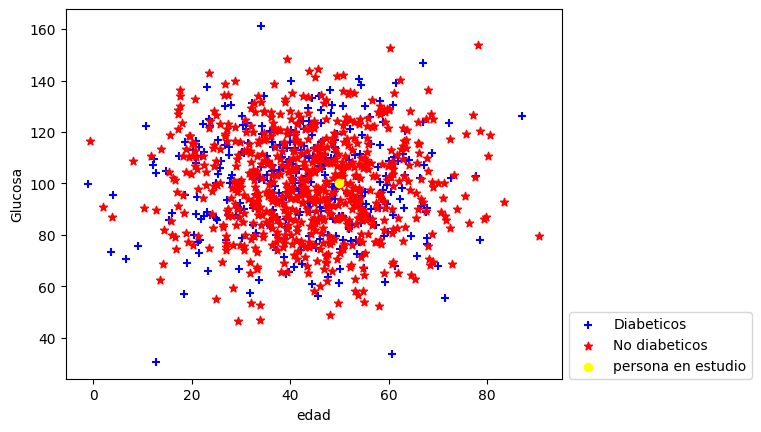

In [93]:

plt.scatter(diabeticos['Age'],diabeticos['Glucose'],marker='+',color='blue',label='Diabeticos')
plt.scatter(no_diabeticos['Age'],no_diabeticos['Glucose'],marker='*',color='red',label='No diabeticos')
plt.scatter(edad,glucosa,marker='o',color='yellow',label='persona en estudio')
plt.ylabel('Glucosa')
plt.xlabel('edad')

plt.legend(bbox_to_anchor=(1,0.2))
plt.show()